<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Worksheets/8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`)

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up

In [ ]:
import pandas as pd
from scipy.stats import linregress


def is_valid_link(link="",link_name="",autotest=False):
  # link always isn't empty and must have is string
  return_value = link != "" and isinstance(link, str)

  if not return_value and not autotest: # not print if autotest
    print(f"{link_name} is not valid")

  return return_value


def is_valid_df(df=None,name_df="",autotest=False):
  # check that "df" is Data Frame type
  if name_df == "" or not isinstance(name_df, str):
    name_df = "Yuor Data Frame"

  if not isinstance(df, pd.DataFrame) and not autotest: # not print if autotest
    print(f"{name_df} is not valid")
    return False

  return True


# get data from Excel
def get_excel_data(url="",sheet_name="default"):
  # url and sheet name always isn't empty and must have is string

  is_not_valid_url = not is_valid_link(url,"url")
  is_not_valid_sheet_name = not is_valid_link(sheet_name,"sheet name")

  if is_not_valid_url or is_not_valid_sheet_name:
    return False

  if sheet_name == "default":
    df = pd.read_excel(url)
  else:
    df = pd.read_excel(url,sheet_name)

  return df


# get data from CVS
def get_csv_data(url):

  if not is_valid_link(url,"url"):
    return False

  df = pd.read_csv(url)
  return df


# linear regression
def linear_regression(df,name_x="",name_y="",not_display=False):

  if not is_valid_df(df) or not is_valid_link(name_x,"Data X") or not is_valid_link(name_y,"Data Y"):
    return False


  # Extract the 'Age' and 'Income' columns
  data_x = df[name_x]
  data_y = df[name_y]

  # Run the linear regression
  regression = linregress(data_x, data_y)
  if not_display:
    return regression

  # Display the regression result
  print(regression)

  # Display the slope, intercept, and rvalue
  print("Slope:", regression.slope)
  print("Intercept:", regression.intercept)
  print("R-value (Correlation Coefficient):", regression.rvalue)
  print("P-value:", regression.pvalue)
  print("Standard Error:", regression.stderr)

  return regression

# execute procedure from main context
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
df = get_excel_data(url, sheet_name='county-level')
name_x = 'Age'
name_y = 'Income'
regression = linear_regression(df,name_x,name_y)


LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189, intercept_stderr=16.08233482195521)
Slope: -0.31433084434233205
Intercept: 72.78388856978748
R-value (Correlation Coefficient): -0.14787411576068246
P-value: 0.5581637648902298
Standard Error: 0.5255739814332189


### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [ ]:
name_x = 'Population'
regression = linear_regression(df,name_x,name_y,not_display=True)
print("R-value (Correlation Coefficient):", regression.rvalue)

R-value (Correlation Coefficient): 0.11644142628402862


### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [ ]:

# Check the significance of the model
def check_significance(regression):
    if regression.pvalue < 0.05:
        print(f"The model is significant (p-value < 0.05): {regression.pvalue}")
    else:
        print(f"The model is not significant (p-value >= 0.05): {regression.pvalue}")


url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv"
df = get_csv_data(url)
name_x = 'Stress'
name_y = 'Wellbeing'
regression = linear_regression(df,name_x,name_y,not_display=True)
print(regression)
print("R-value (Correlation Coefficient):", regression.rvalue)

# Calculate r-squared (coefficient of determination)
r_squared = regression.rvalue ** 2
print("R-squared:", r_squared)

# Check the significance of the model
check_significance(regression)




LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022, intercept_stderr=2.4636244230057622)
R-value (Correlation Coefficient): -0.6713959740851134
R-squared: 0.4507725540176983
The model is significant (p-value < 0.05): 6.084540561441803e-07


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

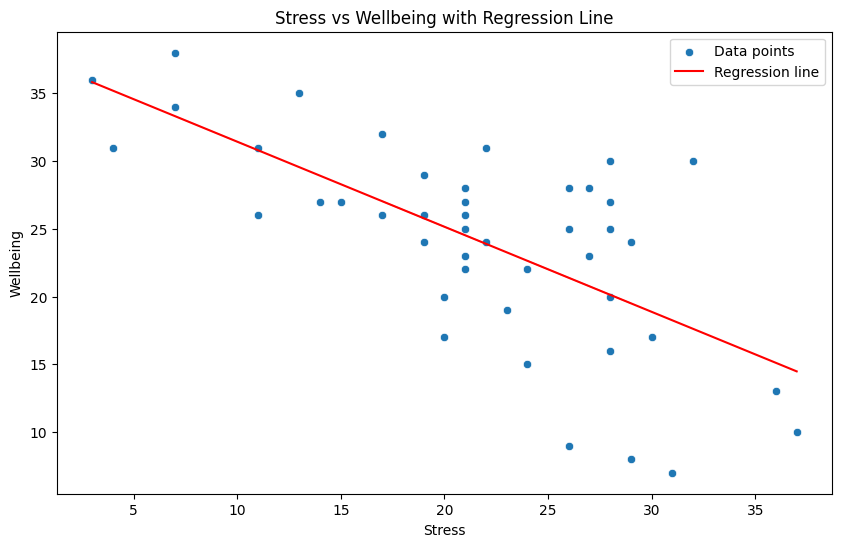


Predicted Wellbeing for Stress level 10: 31.43




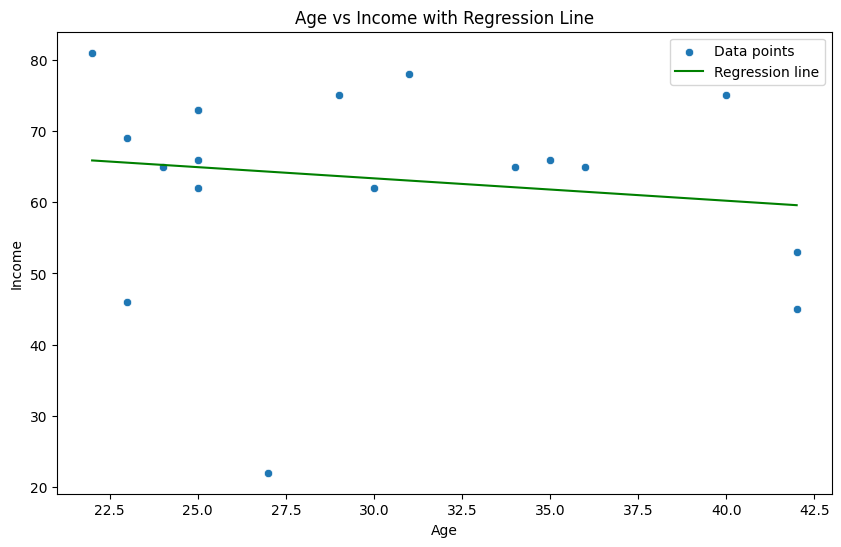


Predicted Income for Age 30: 63.35


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


##############################################################################
# Load the dataset for Positive Psychology
##############################################################################
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = get_csv_data(url)
name_x = 'Stress'
name_y = 'Wellbeing'
regression = linear_regression(df,name_x,name_y,not_display=True)


# Create scatterplot with regression line
data_x = df[name_x]
data_y = df[name_y]
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_x, y=data_y, label='Data points')
sns.lineplot(x=data_x, y=regression.intercept + regression.slope*data_x, color='red', label='Regression line')

# Add labels and title
plt.xlabel(name_x)
plt.ylabel(name_y)
plt.title('Stress vs Wellbeing with Regression Line')

# Plot Regression for Stress and Wellbeing
plt.legend()
plt.show()

# Calculate a prediction for a given stress level
stress_value = 10  # Example stress value to predict wellbeing
predicted_wellbeing = regression.slope * stress_value + regression.intercept
print(f"\nPredicted Wellbeing for Stress level {stress_value}: {predicted_wellbeing:.2f}\n\n")


##############################################################################
# Load the dataset for Age and Income
##############################################################################
url_income = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
df_income = get_excel_data(url_income, sheet_name='county-level')

# Extract 'Age' and 'Income' columns
name_x = 'Age'
name_y = 'Income'
x_income = df_income[name_x]
y_income = df_income[name_y]

# Perform linear regression for Age vs Income
regression_income = linear_regression(df_income,name_x,name_y,not_display=True)

# Create scatterplot with regression line for Age and Income
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_income, y=y_income, label='Data points')
sns.lineplot(x=x_income, y=regression_income.intercept + regression_income.slope*x_income, color='green', label='Regression line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income with Regression Line')

# Display the plot
plt.legend()
plt.show()

# Calculate a prediction for a given age
age_value = 30  # Example age to predict income
predicted_income = regression_income.slope * age_value + regression_income.intercept
print(f"\nPredicted Income for Age {age_value}: {predicted_income:.2f}")



# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)